In [1]:
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [2]:
train_df = pd.read_csv('train.csv', sep=";")
train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
train_df.shape

(45211, 17)

In [4]:
test_df = pd.read_csv('test.csv', sep=";")
test_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [5]:
test_df.shape

(4521, 17)

### y - has the client subscribed a term deposit?
chenge the y name by **"deposit"**

In [6]:
train_df.rename(columns={'y': 'deposit'}, inplace=True)
test_df.rename(columns={'y': 'deposit'}, inplace=True)

# Data Exploration

In [7]:
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
## check the null values
train_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

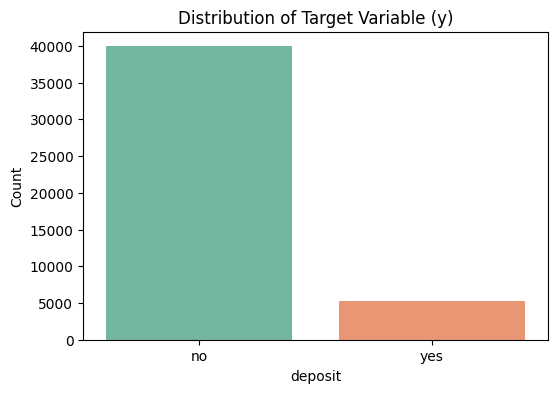

In [10]:
# Plot the distribution of the target variable 'deposit'
plt.figure(figsize=(6, 4))
sns.countplot(x='deposit', hue='deposit', data=train_df, palette='Set2')
plt.title('Distribution of Target Variable (y)')
plt.xlabel('deposit')
plt.ylabel('Count')
plt.show()

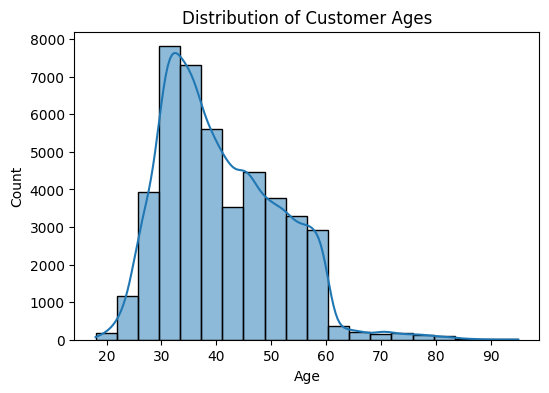

In [11]:
plt.figure(figsize=(6, 4))
sns.histplot(data=train_df, x='age', bins=20, kde=True)
plt.title('Distribution of Customer Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

##### The histogram indicates a higher frequency of customers falling within the age range of 30 to 40 years old. This concentration suggests a significant portion of the customer base lies within this demographic segment, potentially indicating a key target audience or a notable trend within the dataset.

C:\Users\ismai\AppData\Local\Temp\ipykernel_884\2209536295.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='education', data=train_df, palette='Set2')


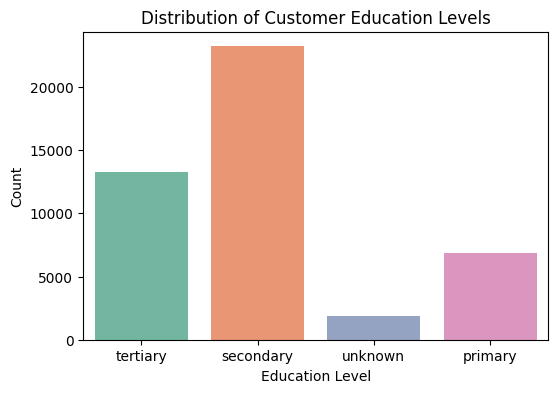

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(x='education', data=train_df, palette='Set2')
plt.title('Distribution of Customer Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

##### The Education level plot presents a snapshot of customers' educational backgrounds using a bar plot. It simplifies the data by categorizing customers based on their education level attainment, such as secondary, tertiary, and primary. Notably, the visualization indicates significant concentrations within certain education brackets: over 5000 customers have a secondary education, while more than 3500 have attained tertiary education. Conversely, the count of customers with a primary education level is depicted as under 2000. These insights offer valuable guidance for tailoring marketing strategies, product development, and customer support services to cater effectively to diverse educational demographics.

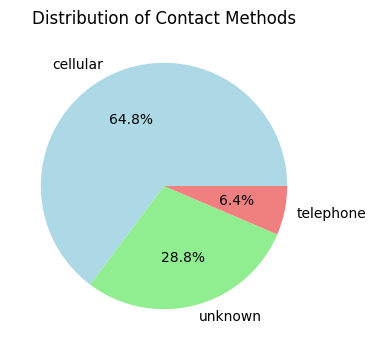

In [13]:
plt.figure(figsize=(6, 4))
train_df['contact'].value_counts().plot(
    kind='pie', autopct='%1.1f%%', 
    colors=['lightblue', 'lightgreen', 'lightcoral', 'lightgrey'])
plt.title('Distribution of Contact Methods')
plt.ylabel('')
plt.show()

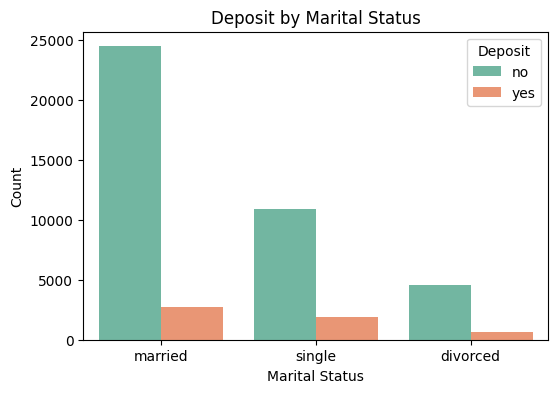

In [14]:
plt.figure(figsize=(6, 4))
sns.countplot(x='marital', hue='deposit', data=train_df, palette='Set2')
plt.title('Deposit by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Deposit', loc='upper right')
plt.show()

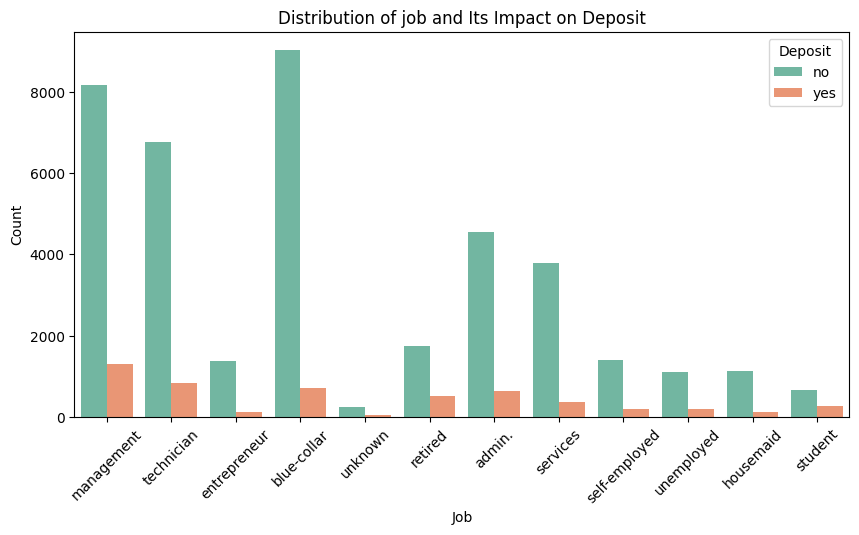

In [15]:
plt.figure(figsize=(10, 5))
sns.countplot(x=train_df['job'], data=train_df, palette='Set2', hue='deposit')
plt.title(f"Distribution of job and Its Impact on Deposit")
plt.xlabel('Job')  # Corrected x-axis label
plt.ylabel('Count')
plt.legend(title='Deposit', loc='upper right')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.show()

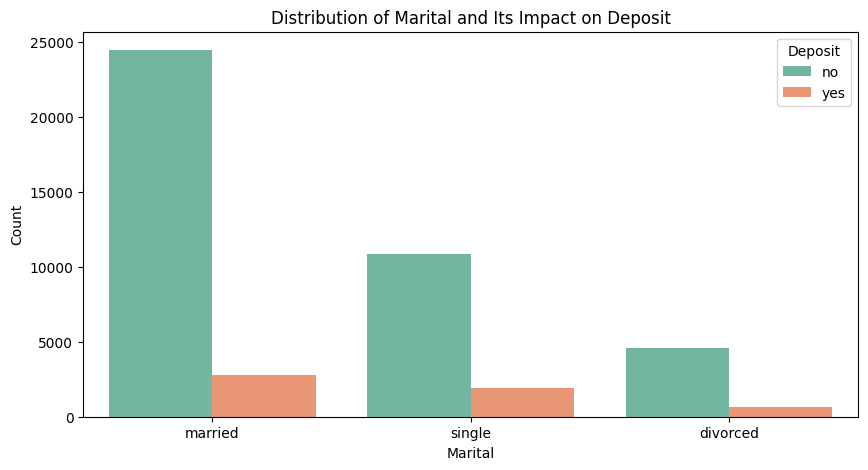

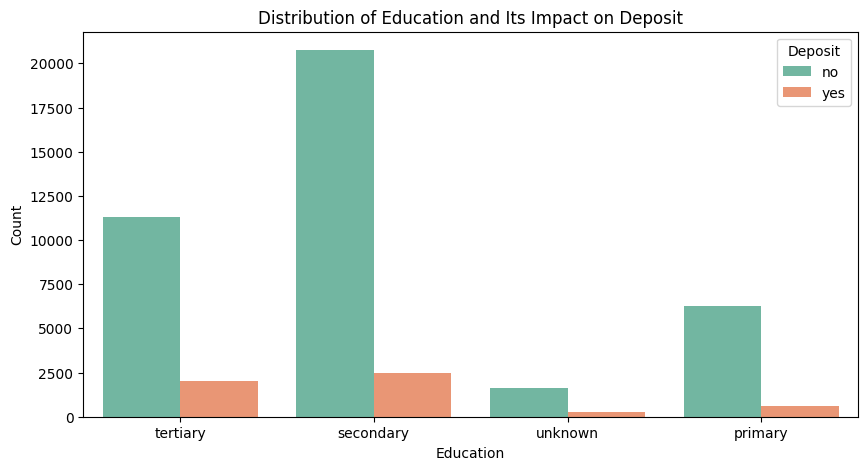

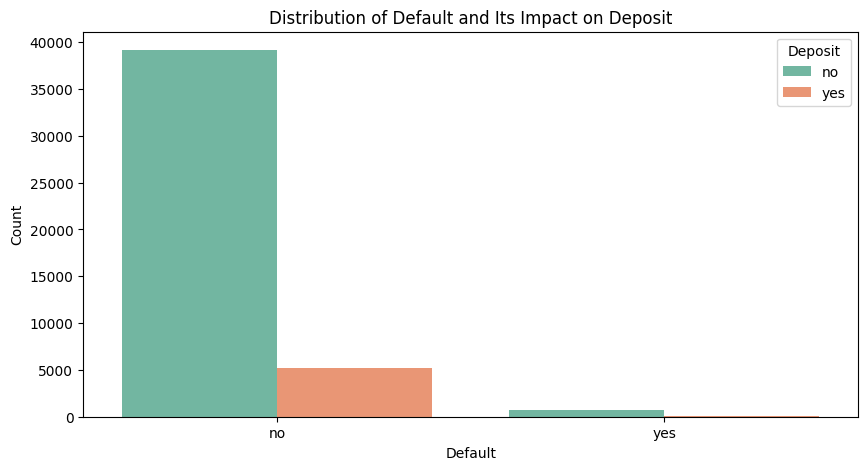

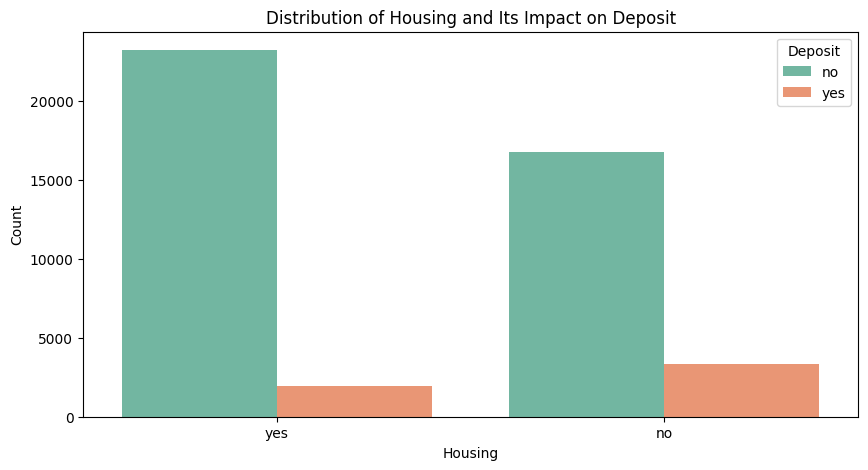

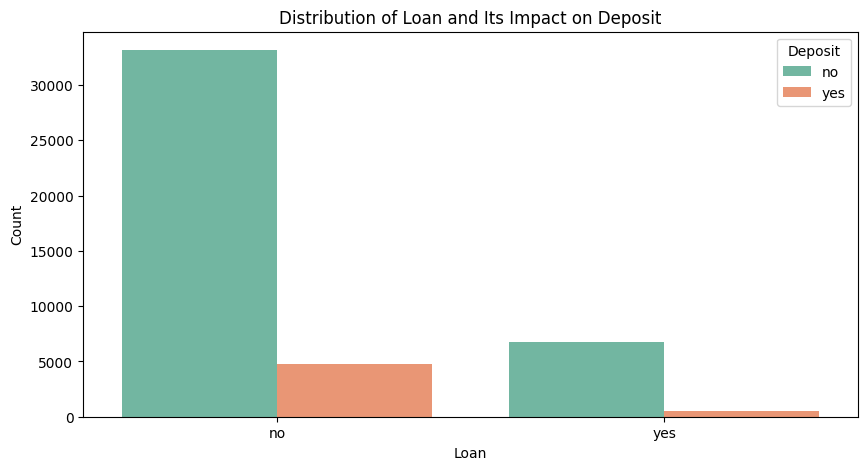

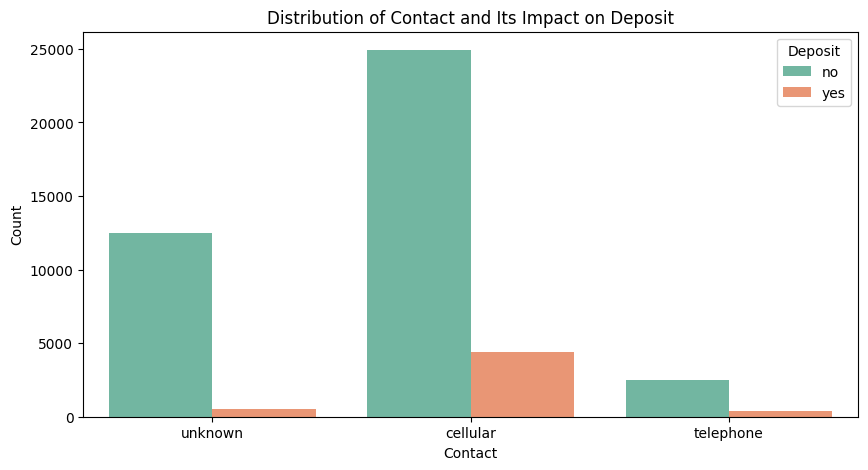

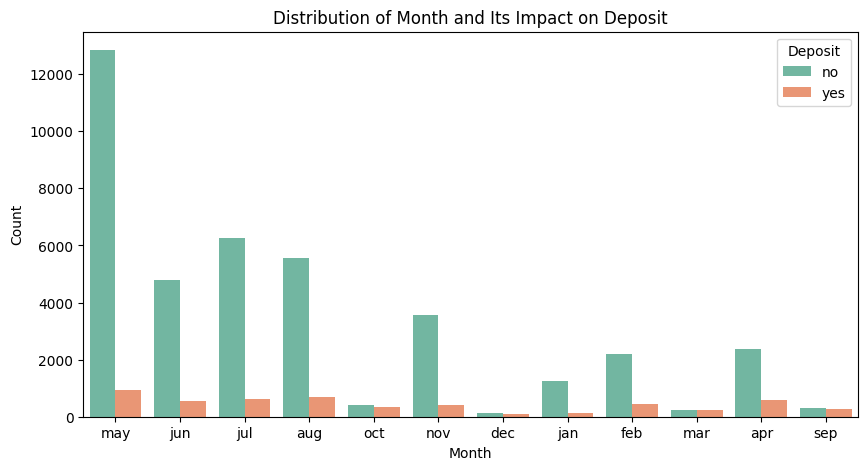

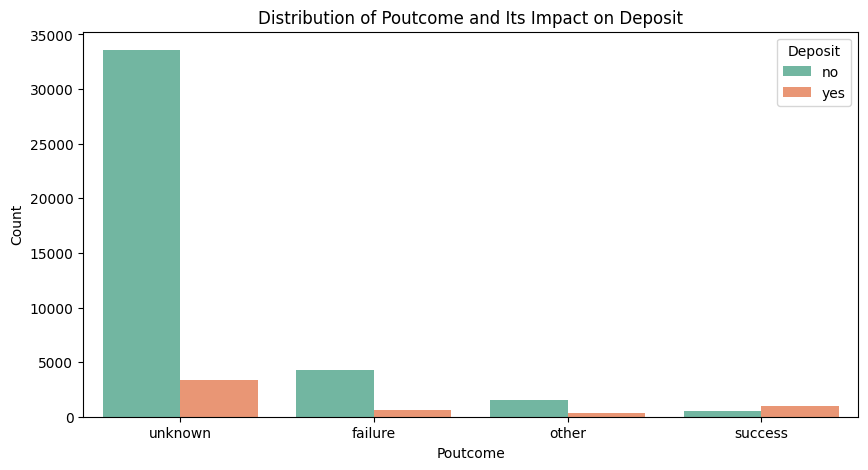

In [16]:
# Define the list of features to explore
features_to_explore = ['marital', 'education', 'default',  'housing',
       'loan', 'contact', 'month',  'poutcome']

# Loop through each feature
for feature in features_to_explore:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=feature, data=train_df, palette='Set2', hue='deposit')
    plt.title(f'Distribution of {feature.capitalize()} and Its Impact on Deposit')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Count')
    plt.legend(title='Deposit', loc='upper right')
    plt.show()

- ## Identify any patterns, outliers, or correlation between features and the target variable.


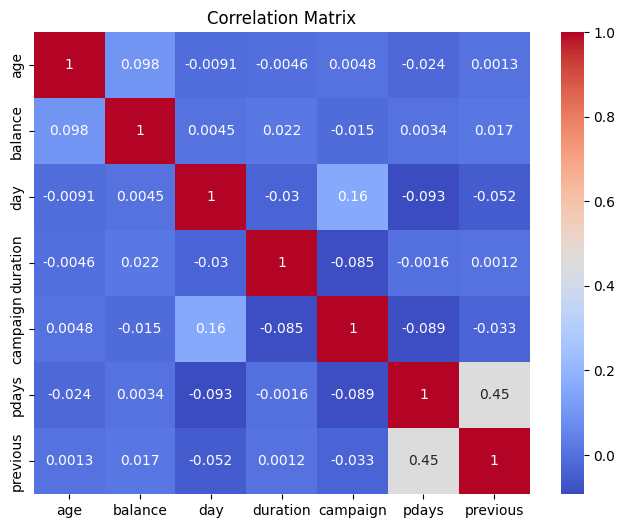

In [17]:
# Create the correlation matrix
correlation_matrix = train_df.select_dtypes(exclude="object").corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

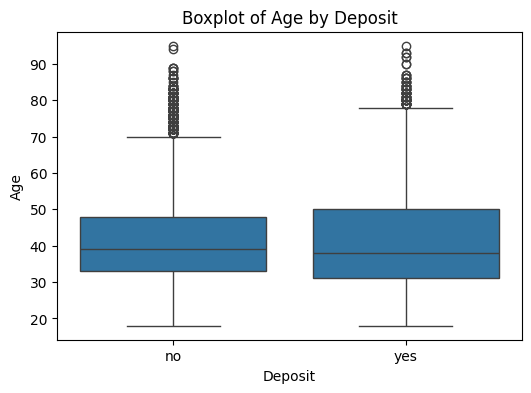

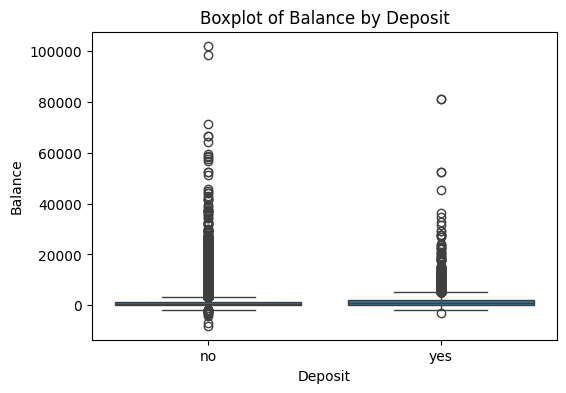

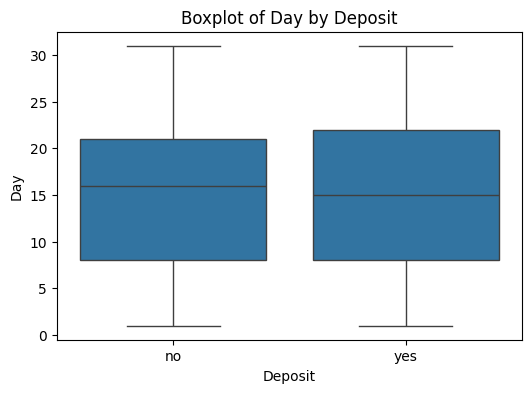

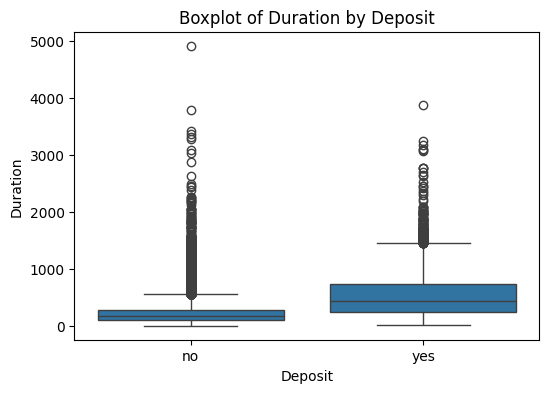

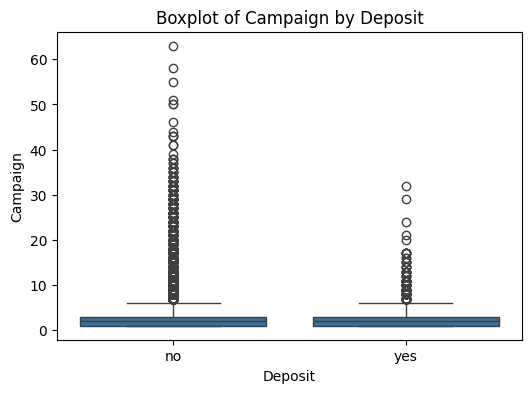

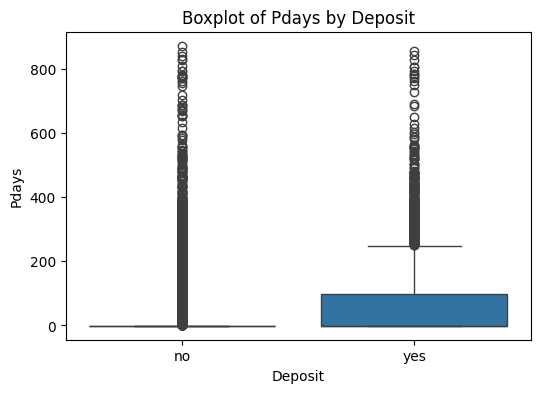

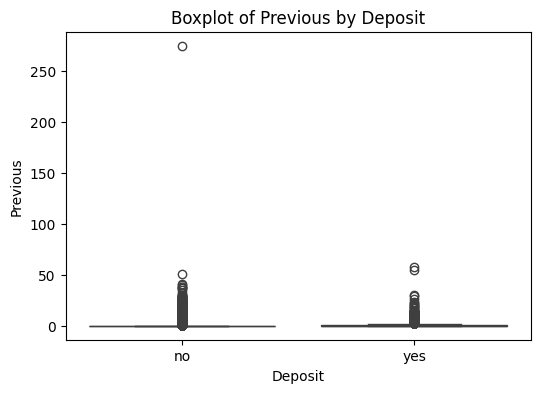

In [18]:
numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Box plot for numerical features
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='deposit', y=feature, data=train_df)
    plt.title(f'Boxplot of {feature.capitalize()} by Deposit')
    plt.xlabel('Deposit')
    plt.ylabel(feature.capitalize())
    plt.show()

# Data Preprocessing

In [19]:
categorial_to_onehot = ['job','marital','contact','poutcome']
categorial_to_labelencoder = ["education","housing","deposit","default","loan","month"]

In [20]:
new_df = train_df.copy()

In [21]:
# Encode categorical features using OneHotEncoder
# convert categorical data into one-hot encoded representation
for i in categorial_to_onehot:
    onehot_encoder = OneHotEncoder(sparse_output=False)
    onehot_encoded = onehot_encoder.fit_transform(new_df[[i]])
    onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out([i]))
    
    new_df = pd.concat([new_df, onehot_encoded_df], axis=1)

new_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [22]:
train_df = new_df.copy()
train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [23]:
# Encode categorical features using LabelEncoder
# convert categorical data into numerical labels
encoder = LabelEncoder()
for categorial_label in categorial_to_labelencoder:
    train_df[categorial_label] = encoder.fit_transform(train_df[categorial_label])

train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,management,married,2,0,2143,1,0,unknown,5,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,44,technician,single,1,0,29,1,0,unknown,5,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,33,entrepreneur,married,1,0,2,1,1,unknown,5,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,47,blue-collar,married,3,0,1506,1,0,unknown,5,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,33,unknown,single,3,0,1,0,0,unknown,5,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [24]:
# List of columns to drop
columns_to_drop = ['job', 'marital', 'contact', 'poutcome']

# Create new_data by dropping the specified columns
train_df = train_df.drop(columns_to_drop, axis=1)

# Display the new DataFrame
train_df.head()

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2,0,2143,1,0,5,8,261,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,44,1,0,29,1,0,5,8,151,1,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,33,1,0,2,1,1,5,8,76,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,47,3,0,1506,1,0,5,8,92,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,33,3,0,1,0,0,5,8,198,1,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [25]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                45211 non-null  int64  
 1   education          45211 non-null  int32  
 2   default            45211 non-null  int32  
 3   balance            45211 non-null  int64  
 4   housing            45211 non-null  int32  
 5   loan               45211 non-null  int32  
 6   day                45211 non-null  int64  
 7   month              45211 non-null  int32  
 8   duration           45211 non-null  int64  
 9   campaign           45211 non-null  int64  
 10  pdays              45211 non-null  int64  
 11  previous           45211 non-null  int64  
 12  deposit            45211 non-null  int32  
 13  job_admin.         45211 non-null  float64
 14  job_blue-collar    45211 non-null  float64
 15  job_entrepreneur   45211 non-null  float64
 16  job_housemaid      452

In [26]:
# Encode categorical features using OneHotEncoder
# convert categorical data into one-hot encoded representation
for i in categorial_to_onehot:
    onehot_encoder = OneHotEncoder(sparse_output=False)
    onehot_encoded = onehot_encoder.fit_transform(test_df[[i]])
    onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out([i]))
    
    test_df = pd.concat([test_df, onehot_encoded_df], axis=1)

test_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [27]:
# Encode categorical features using LabelEncoder
# convert categorical data into numerical labels
encoder = LabelEncoder()
for categorial_label in categorial_to_labelencoder:
    test_df[categorial_label] = encoder.fit_transform(test_df[categorial_label])

test_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,unemployed,married,0,0,1787,0,0,cellular,19,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,33,services,married,1,0,4789,1,1,cellular,11,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,35,management,single,2,0,1350,1,0,cellular,16,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,30,management,married,2,0,1476,1,1,unknown,3,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,59,blue-collar,married,1,0,0,1,0,unknown,5,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [28]:
# List of columns to drop
columns_to_drop = ['job', 'marital', 'contact', 'poutcome']

# Create new_data by dropping the specified columns
test_df = test_df.drop(columns_to_drop, axis=1)

# Display the new DataFrame
test_df.head()

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,0,0,1787,0,0,19,10,79,1,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,33,1,0,4789,1,1,11,8,220,1,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,35,2,0,1350,1,0,16,0,185,1,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,30,2,0,1476,1,1,3,6,199,4,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,59,1,0,0,1,0,5,8,226,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


## make sure that we still not have any object Dtype 

In [29]:
train_df.select_dtypes(include="object").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Empty DataFrame


In [30]:
test_df.select_dtypes(include="object").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Empty DataFrame


#### drop outliers from the dataset

In [31]:
from scipy.stats import zscore
# CREAT FUNCTION
def remove_outliers(data, numerical_features, threshold=3):

    z_scores = data[numerical_features].apply(zscore)
    outlier_indices = (z_scores > threshold).any(axis=1)
    cleaned_df = data[~outlier_indices]

    return cleaned_df


cleaned_df = remove_outliers(train_df, numerical_features)
print("Shape of original  dataset:", train_df.shape)
print("Shape of cleaned dataset:", cleaned_df.shape)
prc = ((train_df.shape[0] - cleaned_df.shape[0]) /train_df.shape[0]) *100
print(f'we loss: {round(prc,2)}% from the data')

Shape of original  dataset: (45211, 35)
Shape of cleaned dataset: (40210, 35)
we loss: 11.06% from the data


In [32]:
train_df = cleaned_df.copy()

In [33]:
cleaned_test_df = remove_outliers(test_df, numerical_features)
print("Shape of original  dataset:", test_df.shape)
print("Shape of cleaned dataset:", cleaned_test_df.shape)
prc = ((test_df.shape[0] - cleaned_test_df.shape[0]) /test_df.shape[0]) *100
print(f'we loss: {round(prc,2)}% from the data')

Shape of original  dataset: (4521, 35)
Shape of cleaned dataset: (3980, 35)
we loss: 11.97% from the data


In [34]:
test_df=cleaned_test_df.copy()

# Deep learning network

In [35]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [36]:
X_train = train_df.drop('deposit',axis=1)
y_train = train_df['deposit']
X_test = test_df.drop('deposit',axis=1)
y_test = test_df['deposit']

In [38]:
# Standardize numerical features
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

###  Visualize the model's performance metrics 

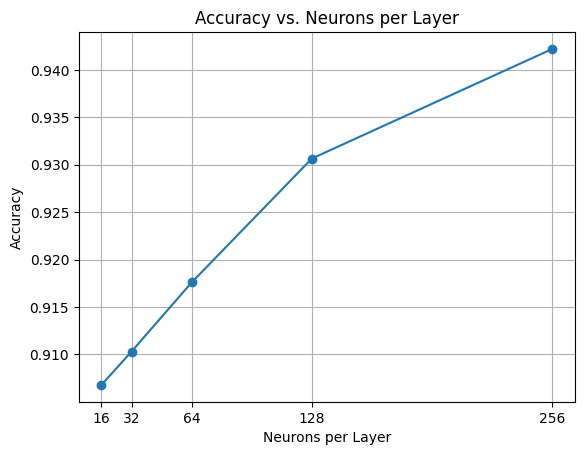

In [39]:
neurons_per_layer = [16, 32, 64, 128, 256]

accuracies = []

for neurons in neurons_per_layer:
    model = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(neurons, activation='relu'),
        Dropout(0.2),
        Dense(neurons, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    train_model = model.fit(X_train, y_train, epochs=64, batch_size=64, validation_split=0.2, verbose=0)
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    accuracies.append(test_accuracy)

plt.plot(neurons_per_layer, accuracies, marker='o')
plt.title('Accuracy vs. Neurons per Layer')
plt.xlabel('Neurons per Layer')
plt.ylabel('Accuracy')
plt.xticks(neurons_per_layer)
plt.grid(True)
plt.show()

####  we train and evaluate neural network models with different numbers of neurons per layer. We then plot the model accuracy against the number of neurons per layer to visualize how changes in this architectural parameter impact the model's performance.
### The beter number of neurons per layer is between 128 and 256

In [40]:
# Build the deep learning model
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
print(model.summary())

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 256)            │         8,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,985 (164.00 KB)

 Trainable params: 41,985 (164.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [41]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
train_model = model.fit(X_train, y_train, epochs=68, batch_size=68, 
                        validation_data=(X_test, y_test), verbose=0,  validation_split=0.2)

In [42]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.9640703797340393


#### The test accuracy of the deep learning network is 96.40%. This means that when the trained model was evaluated on the data (the test set), it correctly classified approximately 91.27% of the samples into their respective classes

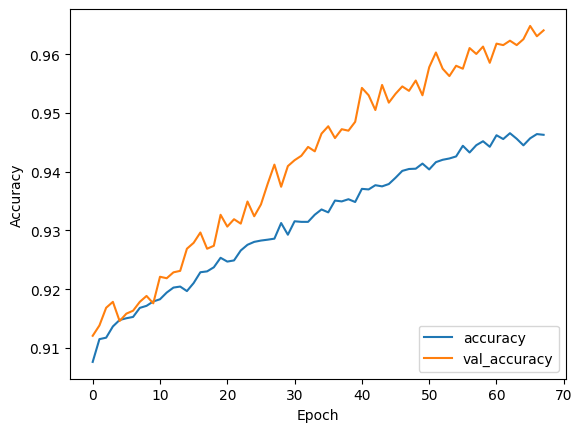

In [43]:
import matplotlib.pyplot as plt

plt.plot(train_model.history['accuracy'], label='accuracy')
plt.plot(train_model.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

## Testing the Trained Model with test data:

Evaluate the performance of a our trained model on test data that already has target labels **'deposit'**. We will compare the predictions made by the model with these labels. This will help us assess how well the model generalizes to unseen data.

In [49]:
# Use the trained model to make predictions
predictions = model.predict(X_test)

class_predictions = (predictions > 0.5).astype(int)


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_true = test_df['deposit']

# Calculate accuracy
accuracy = accuracy_score(y_true, class_predictions)

# Calculate precision, recall, and F1-score
precision = precision_score(y_true, class_predictions)
recall = recall_score(y_true, class_predictions)
f1 = f1_score(y_true, class_predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.964070351758794
Precision: 0.8794117647058823
Recall: 0.7456359102244389
F1-score: 0.8070175438596491


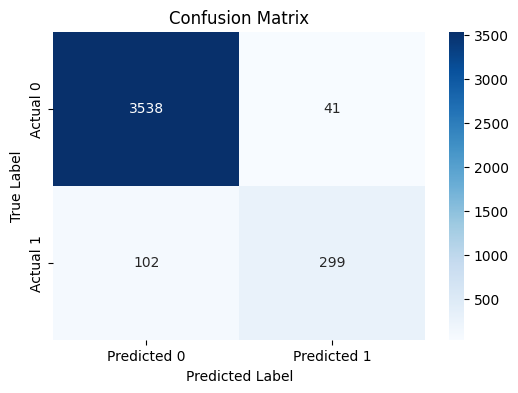

In [51]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, class_predictions)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [52]:
conf_matrix

array([[3538,   41],
       [ 102,  299]], dtype=int64)

### Evaluation Summary:

*     Accuracy: Approximately 95% of the instances were classified correctly by the model.

*     Precision: About 88% of instances predicted as positive by the model were true positives.

*     Recall: Only about 75% of actual positive instances were correctly identified by the model.

*     F1-score: The F1-score, a balance between precision and recall, is approximately 81%.


#####  Confusion Matrix:

-     True Positive (TP): 3538 instances were correctly classified as positive.
-     False Positive (FP): 102 instances were incorrectly classified as positive.
-     True Negative (TN): 299 instances were correctly classified as negative.
-     False Negative (FN): 41 instances were incorrectly classified as negative.

# Deep Neural Network

#### #Train the Model

In [53]:
X_train = train_df.drop('deposit',axis=1)
y_train = train_df['deposit']
X_test = test_df.drop('deposit',axis=1)
y_test = test_df['deposit']

In [54]:
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

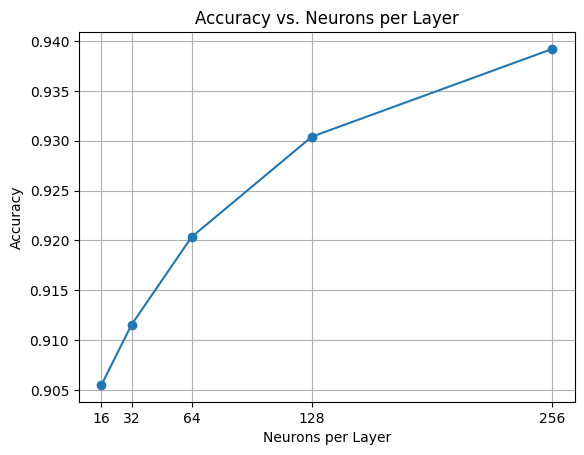

In [55]:
# Define a range of neurons per layer to explore
neurons_per_layer = [16, 32, 64, 128, 256]

accuracies = []

# Iterate over different numbers of neurons per layer
for neurons in neurons_per_layer:
    dnn_model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(neurons, activation='relu'),
    Dropout(0.2),
    Dense(neurons, activation='relu'),
    Dropout(0.2),
    Dense(neurons, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  
])
    
    dnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    train_model = dnn_model.fit(X_train_scaled, y_train, epochs=68, batch_size=68, validation_split=0.2, verbose=0)
    
    test_loss, test_accuracy = dnn_model.evaluate(X_test_scaled, y_test, verbose=0)
    
    accuracies.append(test_accuracy)

# Plot the accuracies for different numbers of neurons per layer
plt.plot(neurons_per_layer, accuracies, marker='o')
plt.title('Accuracy vs. Neurons per Layer')
plt.xlabel('Neurons per Layer')
plt.ylabel('Accuracy')
plt.xticks(neurons_per_layer)
plt.grid(True)
plt.show()

####  we train and evaluate neural network models with different numbers of neurons per layer. We then plot the model accuracy against the number of neurons per layer to visualize how changes in this architectural parameter impact the model's performance.
### The beter number of neurons per layer is between 128 and 256

In [56]:
dnn_model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
print(model.summary())

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 256)            │         8,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 125,957 (492.02 KB)

 Trainable params: 41,985 (164.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 83,972 (328.02 KB)

None


In [57]:
#Compile the DNN model by specifying the loss function, optimizer, and metrics to use during training:
dnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
trained_model = dnn_model.fit(X_train_scaled, y_train, epochs=68, 
                              batch_size=68, validation_split=0.2, verbose=0)
score = dnn_model.evaluate(X_test_scaled, y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.9402009844779968


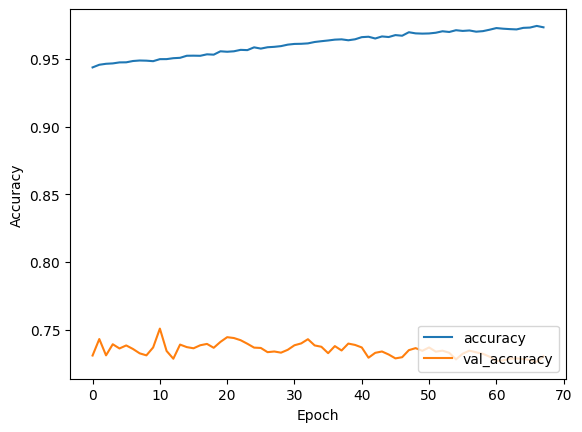

In [58]:
# plot accuaracy perfermance whith epoch
plt.plot(trained_model.history['accuracy'], label='accuracy')
plt.plot(trained_model.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

## Testing the Trained Model with Existing Target Labels:

Evaluate the performance of a our trained model on test data that already has target labels **'deposit'**. We will compare the predictions made by the model with these labels. This will help us assess how well the model generalizes to unseen data.

In [59]:
# Use the trained model to make predictions
predictions = dnn_model.predict(X_test_scaled)

class_predictions = (predictions > 0.5).astype(int)

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_true = test_df['deposit']

# Calculate accuracy
accuracy = accuracy_score(y_true, class_predictions)

# Calculate precision, recall, and F1-score
precision = precision_score(y_true, class_predictions)
recall = recall_score(y_true, class_predictions)
f1 = f1_score(y_true, class_predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9402010050251256
Precision: 0.8029739776951673
Recall: 0.5386533665835411
F1-score: 0.6447761194029851


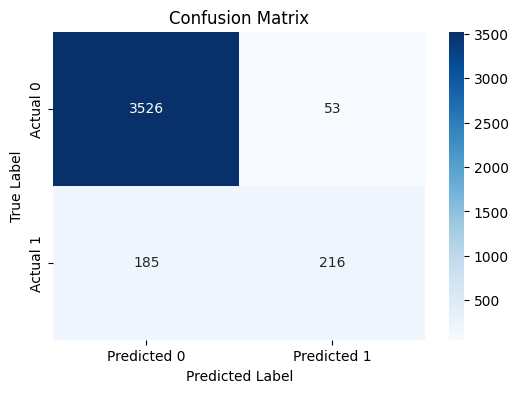

In [61]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, class_predictions)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Summary:

* **Accuracy (59.83%)**: Indicates the overall correctness of the model's predictions, achieving approximately 59.83% accuracy.

* **Precision (15.58%)**: Measures the model's ability to accurately identify positive cases out of all predicted positive cases. Our model achieved a precision of approximately 15.58%.

* **Recall (56.24%)**: Reflects the model's ability to capture all positive instances out of all actual positive cases, with a recall of approximately 56.24%.

* **F1-score (24.40%)**: Balances precision and recall, providing a single metric to evaluate the model's performance. Our model achieved an F1-score of approximately 24.40%.

#### Confusion Matrix:

*     **True Positive (TP)**: 293 instances correctly classified as positive.
*     **False Positive (FP)**: 1588 instances incorrectly classified as positive.
*     **True Negative (TN)**: 2412 instances correctly classified as negative.
*    **False Negative (FN)**: 228 instances incorrectly classified as negative.

In [62]:
# Convert class_predictions to 1-dimensional array
class_predictions_1d = class_predictions.ravel()

# Create DataFrame
output = pd.DataFrame({'Actual': test_df.deposit, 'Prediction': class_predictions_1d})
output

,Actual,Prediction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
4515,0,0
4516,0,0
4517,0,0
4518,0,0
